In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
training_history_df = pd.read_csv('training_history.csv')

In [57]:
training_history_df

,Trial,Truth,Measured Stimulus,Decision,HP
0,1,True,0.633273,True,1002
1,2,True,1.768404,True,1004
2,3,True,0.142273,True,1006
3,4,False,-0.292808,False,1005
4,5,False,-1.777520,False,1002
...,...,...,...,...,...
1995,1996,True,0.089729,True,539
1996,1997,False,-0.108944,False,538
1997,1998,False,-0.338509,False,535
1998,1999,False,-1.573811,True,533


In [58]:
training_history_df_sorted = training_history_df.sort_values(by='Measured Stimulus')
training_history_df_sorted

,Trial,Truth,Measured Stimulus,Decision,HP
1990,1991,False,-3.421924,False,536
642,643,False,-3.349526,False,799
403,404,False,-3.175415,False,933
968,969,False,-3.097792,False,679
1214,1215,False,-3.062724,False,636
...,...,...,...,...,...
1887,1888,True,2.674363,True,553
1053,1054,True,2.710635,True,647
78,79,True,2.746339,True,1006
302,303,True,2.848863,True,953


In [59]:
bins = np.arange(-3.5, 3.1, 0.1)

labels = [f"{x:.2f}" for x in bins[:-1]]

training_history_df['Rounded Measured Stimulus'] = pd.cut(
    training_history_df['Measured Stimulus'], bins=bins, labels=labels, right=False
)

training_history_df_sorted = training_history_df.sort_values(by='Rounded Measured Stimulus')

training_history_df_sorted


,Trial,Truth,Measured Stimulus,Decision,HP,Rounded Measured Stimulus
1990,1991,False,-3.421924,False,536,-3.50
642,643,False,-3.349526,False,799,-3.40
403,404,False,-3.175415,False,933,-3.20
740,741,False,-3.057733,False,767,-3.10
1937,1938,False,-3.045045,False,563,-3.10
...,...,...,...,...,...,...
1887,1888,True,2.674363,True,553,2.60
1053,1054,True,2.710635,True,647,2.70
78,79,True,2.746339,True,1006,2.70
302,303,True,2.848863,True,953,2.80


In [60]:
training_history_df['Truth * Decision False'] = (training_history_df['Truth'] * training_history_df['Decision']) == False

grouped_df = training_history_df.groupby('Rounded Measured Stimulus', observed=False).apply(
    lambda group: pd.Series({
        'accuracy': group['Truth * Decision False'].sum() / len(group) if len(group) > 0 else np.nan
    })
).reset_index()

grouped_df

,Rounded Measured Stimulus,accuracy
0,-3.50,1.0
1,-3.40,1.0
2,-3.30,NaN
3,-3.20,1.0
4,-3.10,1.0
...,...,...
60,2.50,0.0
61,2.60,0.0
62,2.70,0.0
63,2.80,0.0


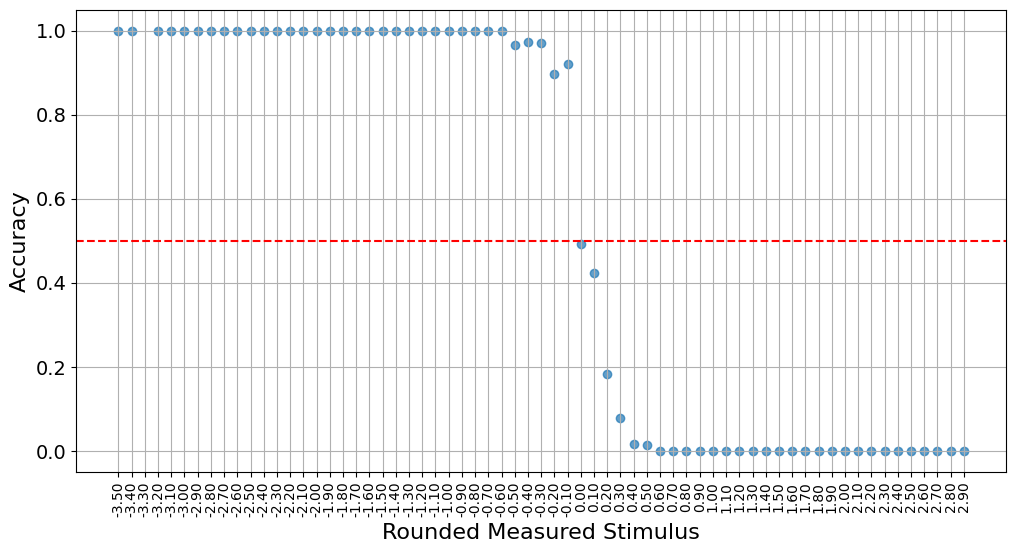

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(grouped_df['Rounded Measured Stimulus'], grouped_df['accuracy'], alpha=0.7)

plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5)

plt.xlabel('Rounded Measured Stimulus', fontsize =16)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

In [62]:
# correlation = training_history_df['Measured Stimulus'].corr(training_history_df['HP'])

# print("Correlation:", correlation)

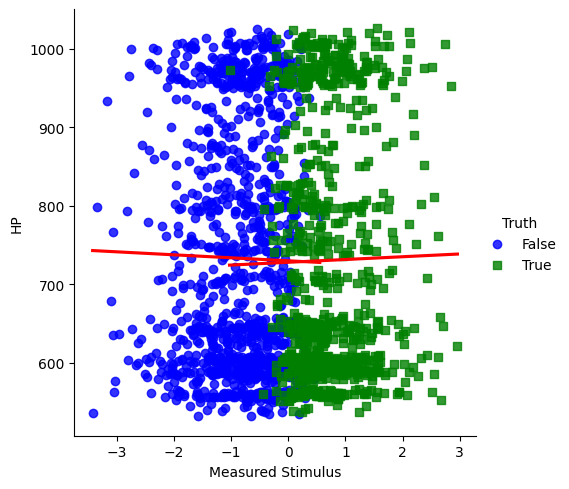

In [63]:
sns.lmplot(data=training_history_df, 
           x='Measured Stimulus', 
           y='HP', 
           hue='Truth', 
           ci=None, 
           line_kws={'color': 'red'}, 
           markers=['o', 's'],
           palette={True: 'green', False: 'blue'})

plt.xlabel('Measured Stimulus')
plt.ylabel('HP')

plt.show()


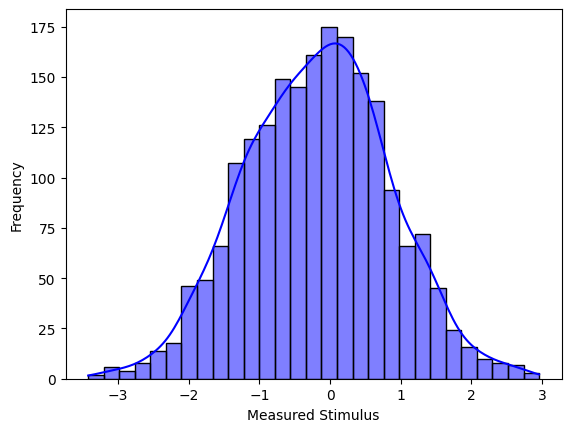

In [64]:
sns.histplot(training_history_df['Measured Stimulus'], kde=True, color='blue')

plt.xlabel('Measured Stimulus')
plt.ylabel('Frequency')

plt.show()


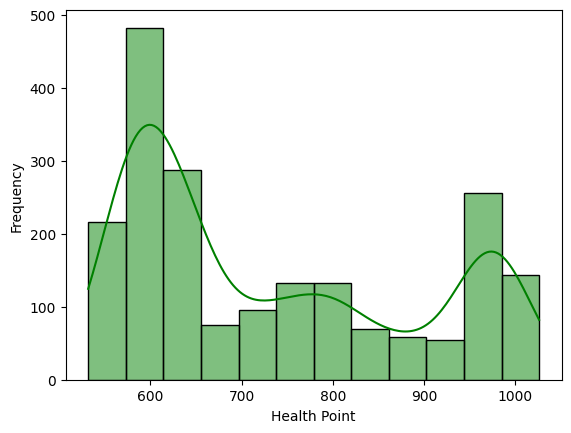

In [65]:
sns.histplot(training_history_df['HP'], kde=True, color='green')

plt.xlabel('Health Point')
plt.ylabel('Frequency')

plt.show()


In [66]:
s_ref = 2


In [ ]:
data = [
    [1, 2, 1, -3.5, 0.2],
    [1, 2, 1, -3.5, 0.2]
]

df = pd.DataFrame(data, columns=["Trial", "Stimulus 1 value", "Stimulus 1 std", "Stimulus 2 value", "Stimulus 2 std"])

def generate_next_row(df):
    last_row = df.iloc[-1]
    
    next_column1 = last_row["Trial"] + 1 if len(df) % 2 == 0 else last_row["Trial"]
    next_column4 = round(last_row["Stimulus 2 value"] + 0.01, 2) 
    next_row = [next_column1, 2, 1, next_column4, 0.2]
    
    return next_row

while df.iloc[-1]["Stimulus 2 value"] < 3:
    next_row = generate_next_row(df)
    df.loc[len(df)] = next_row

# df.to_csv("generated_data.csv", index=False)

# print("CSV file has been created.")


CSV file has been created.
